In [11]:
import torch
import matplotlib.pyplot as plt

Documentation reference: https://www.learnpytorch.io/01_pytorch_workflow/

## Agenda
In this notebook, we try to build a simple linear regression model using PyTorch library while convering all the major steps that are involved when building a typical ML/AI model.

## Steps involved in building a model

In [12]:
# from PIL import Image

# workflow_image = Image.open("/content/pytorch_workflow.png")
# workflow_image

## I. Dataset preparation

As we already know. In order to train a model, we first need to transform our data (could be images, audios, text, etc) into tensors. In this example, we will simply create the dataset tensor directly without using anything like images, audios, etc.

Dataset consists of two important types of variables,

1. Dependent variable:- Value that the model will predict (E.g:- Fruit).
2. Independent variables:- Inputs on which model will decide the dependent variable value (E.g: Sweetness, Price, Season, etc).

In [13]:
# INDEPENDENT VARIABLE
X = torch.arange(0, 100, 0.2)

# KNOWN PARAMETERS
weight = 0.7
bias = 0.3

# DEPENDENT VARIABLE
y = weight * X + bias

In [14]:
print("INDEPENDENT VARIABLE")
print(X)
print()
print("DEPENDENT VARIABLE")
print(y)

INDEPENDENT VARIABLE
tensor([ 0.0000,  0.2000,  0.4000,  0.6000,  0.8000,  1.0000,  1.2000,  1.4000,
         1.6000,  1.8000,  2.0000,  2.2000,  2.4000,  2.6000,  2.8000,  3.0000,
         3.2000,  3.4000,  3.6000,  3.8000,  4.0000,  4.2000,  4.4000,  4.6000,
         4.8000,  5.0000,  5.2000,  5.4000,  5.6000,  5.8000,  6.0000,  6.2000,
         6.4000,  6.6000,  6.8000,  7.0000,  7.2000,  7.4000,  7.6000,  7.8000,
         8.0000,  8.2000,  8.4000,  8.6000,  8.8000,  9.0000,  9.2000,  9.4000,
         9.6000,  9.8000, 10.0000, 10.2000, 10.4000, 10.6000, 10.8000, 11.0000,
        11.2000, 11.4000, 11.6000, 11.8000, 12.0000, 12.2000, 12.4000, 12.6000,
        12.8000, 13.0000, 13.2000, 13.4000, 13.6000, 13.8000, 14.0000, 14.2000,
        14.4000, 14.6000, 14.8000, 15.0000, 15.2000, 15.4000, 15.6000, 15.8000,
        16.0000, 16.2000, 16.4000, 16.6000, 16.8000, 17.0000, 17.2000, 17.4000,
        17.6000, 17.8000, 18.0000, 18.2000, 18.4000, 18.6000, 18.8000, 19.0000,
        19.2000, 19

### Visualizing the data

ML engineers make use of the 'matplotlib.pyplot' library for visualizing our data (can be input, output, etc) into insightful graphs. There is another library called 'seaborn' which can be used to visualize data into more complex forms such as heatmaps but we will not be using it as our dataset is quite simple.

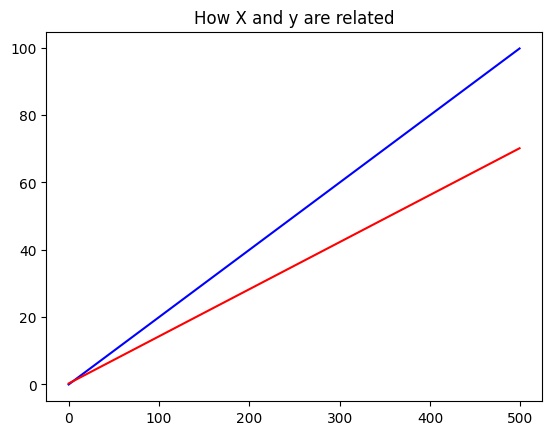

In [15]:
plt.plot(X, color='blue')
plt.plot(y, color='red')
plt.title("How X and y are related")
plt.show()

What can we conclude from the above graph?

1. X is directly proportional to y.
2. X is always greater than or equal to y.
3. X has a steeper slope as compare to y, indicating that as both the values increase, the gap between X and y grows larger and larger.

### Train-Test Split

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

1. Train:-
  - Part of the dataset that is used to train the model.
  - 80-85% of the dataset.
2. Test:-
  - Part of the dataset that is kept hidden from the model and once the training finishes, is used to test how accurate the final model is.
  - 5-10% of the dataset.
3. Validation:-
  - Part of the dataset that is used to validate the models outputs after every epoch (One iteration over the training data).
  - Kind of like how students revise their concepts once they are done studying.
  - 5-10% of the dataset.

NOTE: If you are not using techniques like cross-validation or a test set early in development, a separate validation set is often necessary. In simpler setups like ours, we may skip validation if hyperparameter tuning isn't required.

In [16]:
# 80% TRAIN AND 20% TEST SPLIT
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:int(len(y)*split_ratio)]

X_test = X[split_index:]
y_test = y[int(len(y)*split_ratio):]

In [17]:
print(f"First {split_index}: Training set,")
print(len(X_train))
print(len(y_train))
print()
print(f"Remaining {int(len(X)) - split_index}: Test set,")
print(len(X_test))
print(len(y_test))

First 400: Training set,
400
400

Remaining 100: Test set,
100
100


In [18]:
y_train

tensor([ 0.3000,  0.4400,  0.5800,  0.7200,  0.8600,  1.0000,  1.1400,  1.2800,
         1.4200,  1.5600,  1.7000,  1.8400,  1.9800,  2.1200,  2.2600,  2.4000,
         2.5400,  2.6800,  2.8200,  2.9600,  3.1000,  3.2400,  3.3800,  3.5200,
         3.6600,  3.8000,  3.9400,  4.0800,  4.2200,  4.3600,  4.5000,  4.6400,
         4.7800,  4.9200,  5.0600,  5.2000,  5.3400,  5.4800,  5.6200,  5.7600,
         5.9000,  6.0400,  6.1800,  6.3200,  6.4600,  6.6000,  6.7400,  6.8800,
         7.0200,  7.1600,  7.3000,  7.4400,  7.5800,  7.7200,  7.8600,  8.0000,
         8.1400,  8.2800,  8.4200,  8.5600,  8.7000,  8.8400,  8.9800,  9.1200,
         9.2600,  9.4000,  9.5400,  9.6800,  9.8200,  9.9600, 10.1000, 10.2400,
        10.3800, 10.5200, 10.6600, 10.8000, 10.9400, 11.0800, 11.2200, 11.3600,
        11.5000, 11.6400, 11.7800, 11.9200, 12.0600, 12.2000, 12.3400, 12.4800,
        12.6200, 12.7600, 12.9000, 13.0400, 13.1800, 13.3200, 13.4600, 13.6000,
        13.7400, 13.8800, 14.0200, 14.16

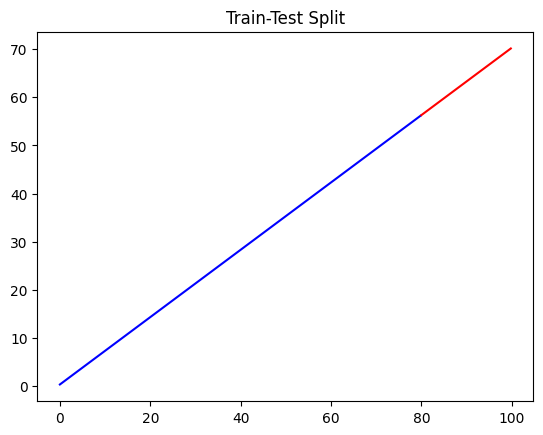

In [19]:
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='red')
plt.title("Train-Test Split")
plt.show()

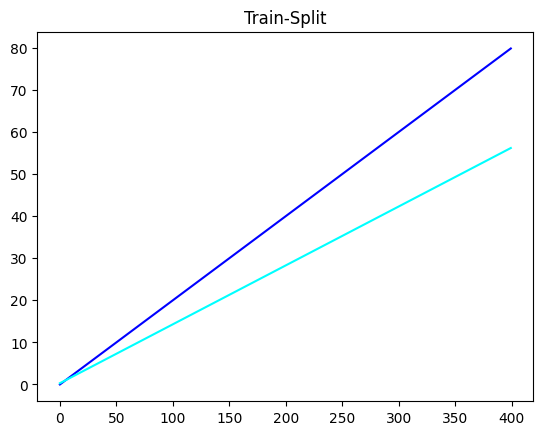

In [20]:
plt.plot(X_train, color='blue')
plt.plot(y_train, color='cyan')
plt.title("Train-Split")
plt.show()

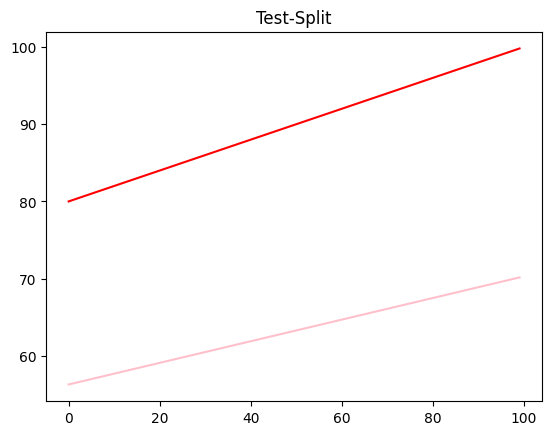

In [44]:
plt.plot(X_test, color='red')
plt.plot(y_test, color='pink')
plt.title("Test-Split")
plt.show()

## II. Building a Model

Now that we've got some data, let's build a model to use the training-set to train the model and test its accuracy using the test-set.

Let's replicate a standard linear regression model using pure PyTorch.



In [36]:
from torch import nn    # Contains the building blocks for creating neural networks in PyTorch

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

### PyTorch model building essentials

|   PyTorch Module              |   Description                                                                                                                                                             |
|-------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torch.nn`                     | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).                                         |
| `torch.nn.Parameter`           | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically. |
| `torch.nn.Module`              | The base class for all neural network modules. All building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| `torch.optim`                  | Contains various optimization algorithms. These tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and reduce the loss.     |
| `def forward()`                | All `nn.Module` subclasses require a `forward()` method. This defines the computation that will take place on the data passed to the particular `nn.Module`.                |


In [37]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
# GETTING TEST SET RESULTS WITH BASE(UNTRAINED) MODEL
with torch.inference_mode():
  y_pred = model_0(X_test)

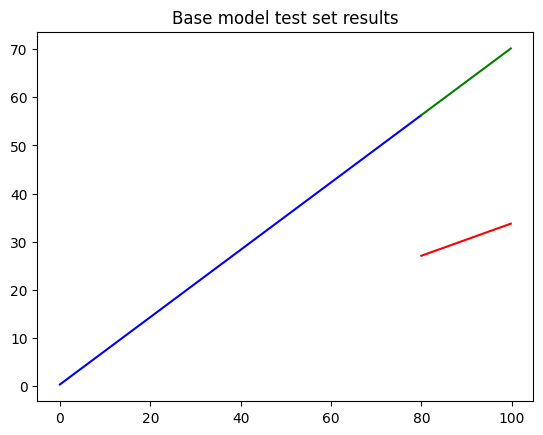

If the model was 100% accurate, the green and red lines would have overlapped each other.


In [45]:
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.title("Base model test set results")
plt.show()
print("If the model was 100% accurate, the green and red lines would have overlapped each other.")

## III. Train a model